In [1]:
# Make relevant plots of:
#  - Policies (as histogram)
#  - Policies (as bar chart)
#  - Diff in dose vs observed mortality for diff policies

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle
import matplotlib.pyplot as plt

In [2]:
#Keep as the orginal dataset 'Final2'
df_orig = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\Final2.csv')

In [3]:
#Upload the below 65 train dataset
df_train = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_train_data_final_cont.csv')

In [4]:
#Upload the below 65 test dataset
df_test = pd.read_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_test_data_final_cont.csv')

In [5]:
df_train_orig = df_orig[df_orig['stay_id'].isin(df_train['stay_id'].unique())]

In [6]:
df_test_orig = df_orig[df_orig['stay_id'].isin(df_test['stay_id'].unique())]

In [7]:
#  next two cells - check that the extracted trajectories are ok

In [7]:
len(df_test) == len(df_test_orig)

True

In [8]:
False in np.array(df_test['stay_id']) == np.array(df_test_orig['stay_id'])

False

In [9]:
df_test.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
0,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.000000,0.514568,0.3125,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025
1,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.086957,0.514568,0.3125,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,0.625
2,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.130435,0.514568,0.0000,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025
3,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.217391,0.514568,0.3750,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025
4,30223578,0.0,0.75,0.886076,0.136949,1.0,0.0,0.260870,0.514568,0.0625,...,0.548997,0.486842,0.605949,0.974913,0.359217,0.843146,0.0,1,4.0,-0.025


In [10]:
df_test_orig.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,wbc,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp
3145,30223578,2,3,88,75.5,1,3,0,2.879823,36.0,...,28.8,2.895128,2.5,120.0,36.980675,89.289529,2.402412,39.840004,0.0,1
3146,30223578,2,3,88,75.5,1,3,2,2.879823,36.0,...,28.8,2.895128,2.5,120.0,36.980675,89.289529,2.402412,39.840004,0.0,1
3147,30223578,2,3,88,75.5,1,3,3,2.879823,36.0,...,28.8,2.895128,2.5,120.0,36.980675,89.289529,2.402412,39.840004,0.0,1
3148,30223578,2,3,88,75.5,1,3,5,2.879823,36.0,...,28.8,2.895128,2.5,120.0,36.980675,89.289529,2.402412,39.840004,0.0,1
3149,30223578,2,3,88,75.5,1,3,6,2.879823,36.0,...,28.8,2.895128,2.5,120.0,36.980675,89.289529,2.402412,39.840004,0.0,1


In [12]:
#  Extract out the interventions from the training dataset and find the medians for each dosage - these
#  represent the continuous analog of the chosen actions

In [11]:
interventions = df_train_orig[["vaso_amount"]]
interventions.head()

,vaso_amount
0,14.799999
1,14.799999
2,14.799999
3,14.799999
4,39.058680


In [12]:
adjusted_vaso = interventions["vaso_amount"][interventions["vaso_amount"] >0]

In [13]:
vaso_vals = [0]
vaso_vals.extend(adjusted_vaso.quantile([0.125,0.375,0.625,0.875]))

In [14]:
def sliding_mean(data_array, window=1):
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)     
    return np.array(new_list)

In [17]:
#  Next two cells - can change to load the correct phys/agent actions we want in the plots

In [15]:
#Should be SARSA below 65
phys_actions = pickle.load(open( "C:\\Users\\sara1\\Desktop\\Results\\SARSA_continous_noterm\\phys_actions_test.p", "rb" ))

In [16]:
#Part of the paper code. Have not found a way to remove from the graph functions below so for now keep and run.
#You can use the old results for this two does not really matter. What's important is the model that you input in box above
autoencode_actions = pickle.load(open( "C:\\Users\\sara1\\Desktop\\Results\\Ddqn_continous_noterm\\dqn_normal_actions_test.p", "rb" ))
deeprl2_actions = pickle.load(open( "C:\\Users\\sara1\\Desktop\\Results\\Ddqn_continous_noterm\\dqn_normal_actions_test.p", "rb" ))

Text(0, 0.5, 'Frequency')

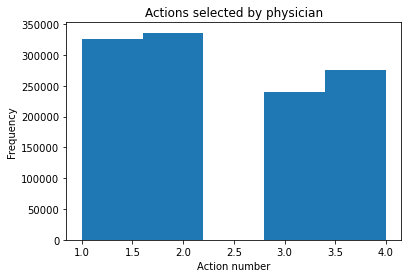

In [17]:
_ = plt.hist(phys_actions, bins=5)
plt.title("Actions selected by physician")
plt.xlabel("Action number")
plt.ylabel("Frequency")

In [18]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [19]:
phys_actions_tuple = [None for i in range(len(phys_actions))]
deeprl2_actions_tuple = [None for i in range(len(phys_actions))]
autoencode_actions_tuple = [None for i in range(len(phys_actions))]                                          

for i in range(len(phys_actions)):
    phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
    deeprl2_actions_tuple[i] = inv_action_map[deeprl2_actions[i]]
    autoencode_actions_tuple[i] = inv_action_map[autoencode_actions[i]]

In [20]:
phys_actions_tuple = np.array(phys_actions_tuple)
deeprl2_actions_tuple = np.array(deeprl2_actions_tuple)
autoencode_actions_tuple = np.array(autoencode_actions_tuple)

In [21]:
phys_actions_vaso = phys_actions_tuple[:,0]
hist, x_edges, y_edges = np.histogram2d(phys_actions_vaso, phys_actions_vaso, bins=5)

In [22]:
deeprl2_actions_vaso = deeprl2_actions_tuple[:,0]
hist2, _, _ = np.histogram2d(deeprl2_actions_vaso, deeprl2_actions_vaso, bins=5)

In [23]:
autoencode_actions_vaso = autoencode_actions_tuple[:,0]
hist3, _, _ = np.histogram2d(autoencode_actions_vaso, autoencode_actions_vaso, bins=5)

In [24]:
x_edges = np.arange(-0.5,5)
y_edges = np.arange(-0.5,5)

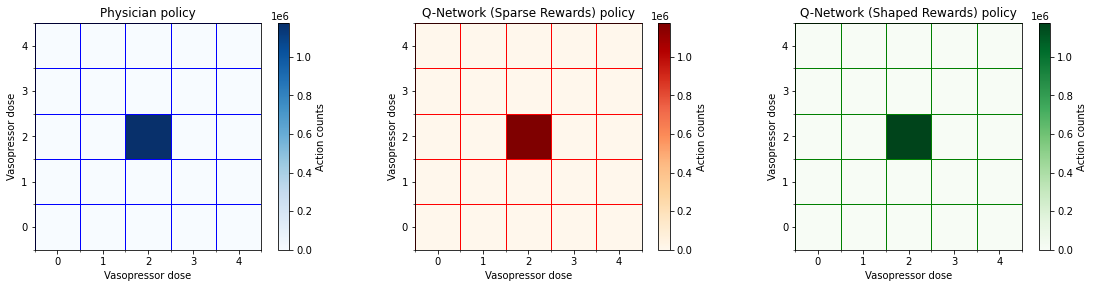

In [25]:
#Only heatmap that matters is the left most one
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist2), cmap="OrRd", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax3.imshow(np.flipud(hist3), cmap="Greens", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# ax1.grid(color='b', linestyle='-', linewidth=1)
# ax2.grid(color='r', linestyle='-', linewidth=1)
# ax3.grid(color='g', linestyle='-', linewidth=1)

# Major ticks
ax1.set_xticks(np.arange(0, 5, 1));
ax1.set_yticks(np.arange(0, 5, 1));
ax2.set_xticks(np.arange(0, 5, 1));
ax2.set_yticks(np.arange(0, 5, 1));
ax3.set_xticks(np.arange(0, 5, 1));
ax3.set_yticks(np.arange(0, 5, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 5, 1));
ax1.set_yticklabels(np.arange(0, 5, 1));
ax2.set_xticklabels(np.arange(0, 5, 1));
ax2.set_yticklabels(np.arange(0, 5, 1));
ax3.set_xticklabels(np.arange(0, 5, 1));
ax3.set_yticklabels(np.arange(0, 5, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax3.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax3.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='r', linestyle='-', linewidth=1)
ax3.grid(which='minor', color='g', linestyle='-', linewidth=1)

im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
f.colorbar(im1, ax=ax1, label = "Action counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist2, cmap='OrRd')
f.colorbar(im2, ax=ax2, label = "Action counts")

im3 = ax3.pcolormesh(x_edges, y_edges, hist3, cmap='Greens')
f.colorbar(im3, ax=ax3, label = "Action counts")

ax1.set_ylabel('Vasopressor dose')
ax2.set_ylabel('Vasopressor dose')
ax3.set_ylabel('Vasopressor dose')
ax1.set_xlabel('Vasopressor dose')
ax2.set_xlabel('Vasopressor dose')
ax3.set_xlabel('Vasopressor dose')

ax1.set_title("Physician policy")
ax2.set_title("Q-Network (Sparse Rewards) policy")
ax3.set_title("Q-Network (Shaped Rewards) policy")
plt.tight_layout()

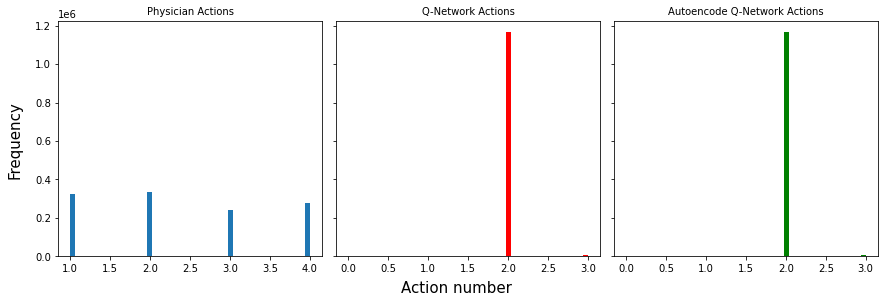

In [26]:
#Kai wen this should be the last box to run. The ones below we don't need so just ignore. Thanks
#Only graph that matters for now is the left most one
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.hist(phys_actions, bins=50)
ax1.set_title("Physician Actions", fontsize = 10)
ax2.hist(deeprl2_actions, bins=50, color='r')
ax2.set_title("Q-Network Actions", fontsize = 10)
ax3.hist(autoencode_actions, bins=50, color='g')
ax3.set_title("Autoencode Q-Network Actions", fontsize = 10)
f.text(0.5, -0.03, 'Action number', ha='center', fontsize=15)
f.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
# ax2.hist(autoencode_actions, bins=25, color ='g')
plt.tight_layout()


In [27]:
def make_df_diff(op_actions):
    op_vaso_med = []
    for action in op_actions:
        vaso,vaso = inv_action_map[action]
        op_vaso_med.append(vaso_vals[vaso])
    vaso_diff = np.array(op_vaso_med) - np.array(df_test_orig['vaso_amount'])
    df_diff = pd.DataFrame()
    df_diff['mort'] = np.array(df_test_orig['died_in_hosp'])
    df_diff['vaso_diff'] = vaso_diff
    return df_diff

In [65]:
#Not needed, do not run this

from scipy.stats import sem
def make_iv_plot_data(df_diff):
    bin_medians_iv = []
    mort_iv = []
    mort_std_iv= []
    i = -800
    while i <= 900:
        count =df_diff.loc[(df_diff['iv_diff']>i-50) & (df_diff['iv_diff']<i+50)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_iv.append(i)
                mort_iv.append(res)
                mort_std_iv.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 100
    return bin_medians_iv, mort_iv, mort_std_iv

In [28]:
from scipy.stats import sem
def make_vaso_plot_data(df_diff):
    bin_medians_vaso = []
    mort_vaso= []
    mort_std_vaso= []
    i = -0.6
    while i <= 0.8:
        count =df_diff.loc[(df_diff['vaso_diff']>i-0.05) & (df_diff['vaso_diff']<i+0.05)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_vaso.append(i)
                mort_vaso.append(res)
                mort_std_vaso.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 0.1
    return bin_medians_vaso, mort_vaso, mort_std_vaso

In [29]:
df_diff_autoencode = make_df_diff(autoencode_actions)
df_diff_deeprl2 = make_df_diff(deeprl2_actions)

In [30]:
bin_med_vaso_auto, mort_vaso_auto, mort_std_vaso_auto = make_vaso_plot_data(df_diff_autoencode)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff_deeprl2)

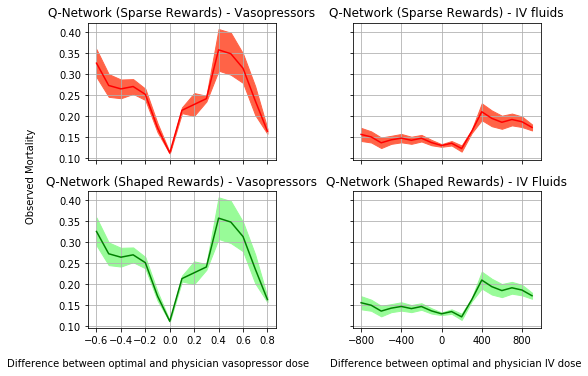

In [69]:
#Don't run this, this from the paper directly.

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize = (7.5,5))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='r')
ax1.fill_between(bin_med_vaso_deep, sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, color='tomato')
ax1.set_title('Q-Network (Sparse Rewards) - Vasopressors')
x_r = [i/10.0 for i in range(-6,10,2)]
y_r = [i/20.0 for i in range(0,20,1)]
ax1.set_xticks(x_r)
ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
ax2.fill_between(bin_med_iv_deep, sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep,  
                 sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, color='tomato')
ax2.set_title('Q-Network (Sparse Rewards) - IV fluids')
x_iv = [i for i in range(-800,900,400)]
ax2.set_xticks(x_iv)
ax2.grid()

ax3.plot(bin_med_vaso_auto, sliding_mean(mort_vaso_auto), color='g')
ax3.fill_between(bin_med_vaso_auto, sliding_mean(mort_vaso_auto) - 1*mort_std_vaso_auto,  
                 sliding_mean(mort_vaso_auto) + 1*mort_std_vaso_auto, color='palegreen')
y_auto = [i/20.0 for i in range(0,21,1)]
ax3.set_yticks(y_auto)
ax3.set_title('Q-Network (Shaped Rewards) - Vasopressors')
ax3.grid()

ax4.plot(bin_med_iv_auto, sliding_mean(mort_iv_auto), color='g')
ax4.fill_between(bin_med_iv_auto, sliding_mean(mort_iv_auto) - 1*mort_std_iv_auto,  
                 sliding_mean(mort_iv_auto) + 1*mort_std_iv_auto, color='palegreen')
ax4.set_title('Q-Network (Shaped Rewards) - IV Fluids')
ax4.grid()
plt.tight_layout()
f.text(0.225, -0.03, 'Difference between optimal and physician vasopressor dose', ha='center', fontsize=10)
f.text(0.775, -0.03, 'Difference between optimal and physician IV dose', ha='center', fontsize=10)
f.text(-0.02, 0.5, 'Observed Mortality', va='center', rotation='vertical', fontsize = 10)

Text(-0.02, 0.5, 'Observed Mortality')

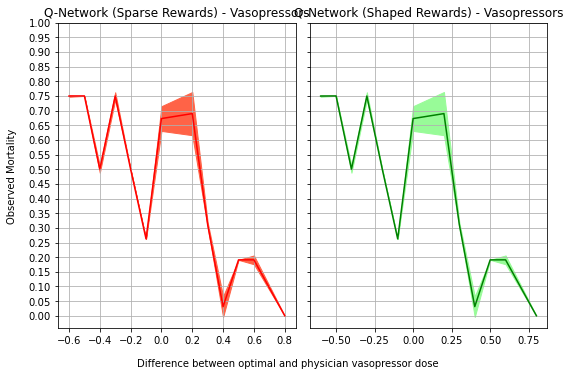

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize = (7.5,5))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='r')
ax1.fill_between(bin_med_vaso_deep, sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, color='tomato')
ax1.set_title('Q-Network (Sparse Rewards) - Vasopressors')
x_r = [i/10.0 for i in range(-6,10,2)]
y_r = [i/20.0 for i in range(0,20,1)]
ax1.set_xticks(x_r)
ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_vaso_auto, sliding_mean(mort_vaso_auto), color='g')
ax2.fill_between(bin_med_vaso_auto, sliding_mean(mort_vaso_auto) - 1*mort_std_vaso_auto,  
                 sliding_mean(mort_vaso_auto) + 1*mort_std_vaso_auto, color='palegreen')
y_auto = [i/20.0 for i in range(0,21,1)]
ax2.set_yticks(y_auto)
ax2.set_title('Q-Network (Shaped Rewards) - Vasopressors')
ax2.grid()

plt.tight_layout()
f.text(0.5, -0.03, 'Difference between optimal and physician vasopressor dose', ha='center', fontsize=10)
f.text(-0.02, 0.5, 'Observed Mortality', va='center', rotation='vertical', fontsize = 10)